<a href="https://colab.research.google.com/github/sijixx/Association-rules-mining-to-find-new-marketing-plans/blob/main/Association_rules_mining_to_find_new_marketing_plans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded= files.upload()

Saving Market Basket Optimisation.csv to Market Basket Optimisation.csv


In [2]:
filedata = pd.read_csv('Market Basket Optimisation.csv')

In [8]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [9]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [10]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [11]:
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Lets use column names instead
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


In [12]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [13]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


In [14]:
df= pd.read_csv("Market Basket Optimisation.csv", delimiter= ",", header= None)

In [15]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_res = pd.DataFrame()
for i in range(len(df.columns)):
    df_res = df_res.append(df[i].value_counts()) 
df_res.head(5)

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,...,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,tea,water spray,zucchini,napkins,asparagus
0,11.0,18.0,3.0,57.0,5.0,6.0,3.0,9.0,4.0,1.0,3.0,23.0,6.0,2.0,576.0,52.0,98.0,25.0,3.0,1.0,25.0,64.0,44.0,5.0,391.0,3.0,7.0,11.0,9.0,270.0,21.0,1.0,17.0,1.0,28.0,2.0,279.0,67.0,18.0,143.0,...,80.0,51.0,12.0,61.0,6.0,38.0,14.0,123.0,10.0,3.0,29.0,7.0,8.0,4.0,1.0,325.0,11.0,78.0,354.0,4.0,8.0,24.0,7.0,12.0,24.0,212.0,4.0,458.0,39.0,7.0,8.0,95.0,47.0,24.0,31.0,NaN,NaN,NaN,NaN,NaN
1,29.0,10.0,2.0,64.0,5.0,8.0,9.0,31.0,8.0,13.0,NaN,22.0,9.0,5.0,78.0,53.0,99.0,11.0,13.0,1.0,18.0,78.0,73.0,1.0,223.0,3.0,5.0,17.0,7.0,101.0,50.0,5.0,32.0,1.0,3.0,17.0,302.0,44.0,48.0,96.0,...,91.0,44.0,40.0,60.0,6.0,6.0,10.0,72.0,17.0,8.0,54.0,6.0,3.0,10.0,2.0,153.0,9.0,76.0,411.0,4.0,10.0,19.0,4.0,22.0,29.0,176.0,3.0,11.0,45.0,13.0,5.0,68.0,92.0,25.0,38.0,5.0,1.0,10.0,NaN,NaN
2,35.0,12.0,5.0,46.0,4.0,12.0,18.0,15.0,13.0,14.0,NaN,35.0,11.0,4.0,NaN,45.0,111.0,9.0,14.0,1.0,20.0,58.0,74.0,6.0,174.0,6.0,2.0,19.0,9.0,50.0,51.0,5.0,34.0,1.0,2.0,18.0,225.0,36.0,34.0,87.0,...,104.0,34.0,37.0,51.0,4.0,1.0,11.0,11.0,17.0,6.0,60.0,8.0,3.0,15.0,4.0,48.0,8.0,77.0,279.0,5.0,10.0,21.0,12.0,21.0,31.0,85.0,9.0,NaN,38.0,18.0,8.0,33.0,69.0,24.0,32.0,4.0,1.0,2.0,NaN,NaN
3,29.0,6.0,4.0,43.0,3.0,11.0,10.0,9.0,9.0,9.0,2.0,26.0,13.0,8.0,NaN,36.0,92.0,4.0,15.0,3.0,26.0,41.0,70.0,5.0,143.0,7.0,4.0,13.0,11.0,55.0,58.0,8.0,29.0,1.0,NaN,15.0,181.0,23.0,18.0,63.0,...,111.0,13.0,8.0,21.0,9.0,NaN,21.0,3.0,24.0,1.0,47.0,4.0,4.0,8.0,4.0,9.0,5.0,72.0,167.0,8.0,8.0,36.0,12.0,20.0,10.0,37.0,5.0,NaN,24.0,12.0,13.0,13.0,68.0,7.0,26.0,1.0,1.0,9.0,1.0,NaN
4,12.0,3.0,4.0,18.0,2.0,8.0,11.0,16.0,9.0,15.0,2.0,28.0,5.0,4.0,NaN,21.0,60.0,8.0,21.0,4.0,26.0,26.0,53.0,6.0,115.0,4.0,4.0,7.0,8.0,45.0,63.0,4.0,28.0,1.0,NaN,9.0,134.0,19.0,12.0,59.0,...,90.0,6.0,12.0,3.0,6.0,NaN,15.0,2.0,24.0,2.0,53.0,8.0,5.0,7.0,2.0,NaN,2.0,45.0,62.0,6.0,7.0,14.0,8.0,32.0,10.0,1.0,6.0,NaN,17.0,16.0,7.0,12.0,63.0,3.0,17.0,4.0,NaN,17.0,2.0,NaN


In [17]:
df_sum = df_res.sum()
df_sum = df_sum.sort_values(ascending=False)
df_sum

mineral water    1788.0
eggs             1348.0
spaghetti        1306.0
french fries     1282.0
chocolate        1230.0
                  ...  
bramble            14.0
cream               7.0
napkins             5.0
water spray         3.0
 asparagus          1.0
Length: 120, dtype: float64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

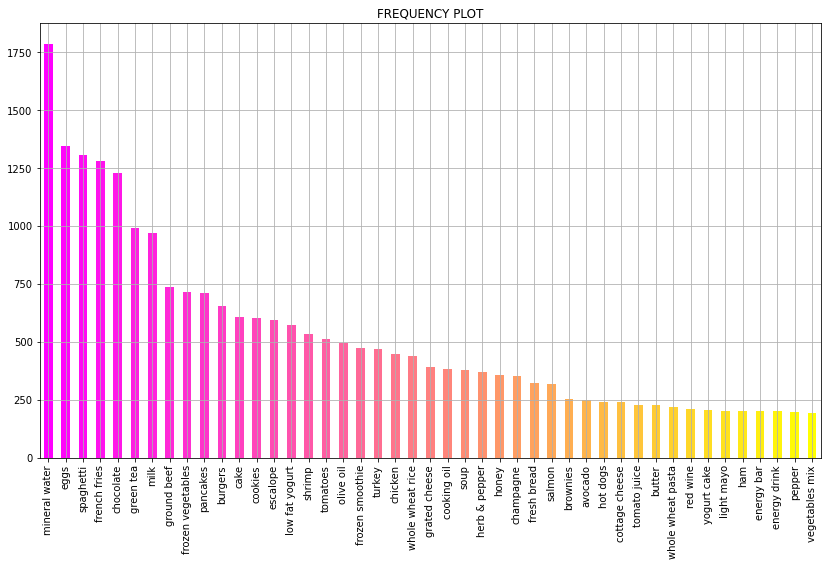

In [20]:
plt.figure(figsize=(14,8))
plt.title("FREQUENCY PLOT")
cnt = 45 
color = plt.cm.spring(np.linspace(0, 1, cnt))
df_sum.head(cnt).plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.grid(True)
plt.axis('on')
plt.show()

In [21]:
!pip install squarify

In [22]:
import squarify

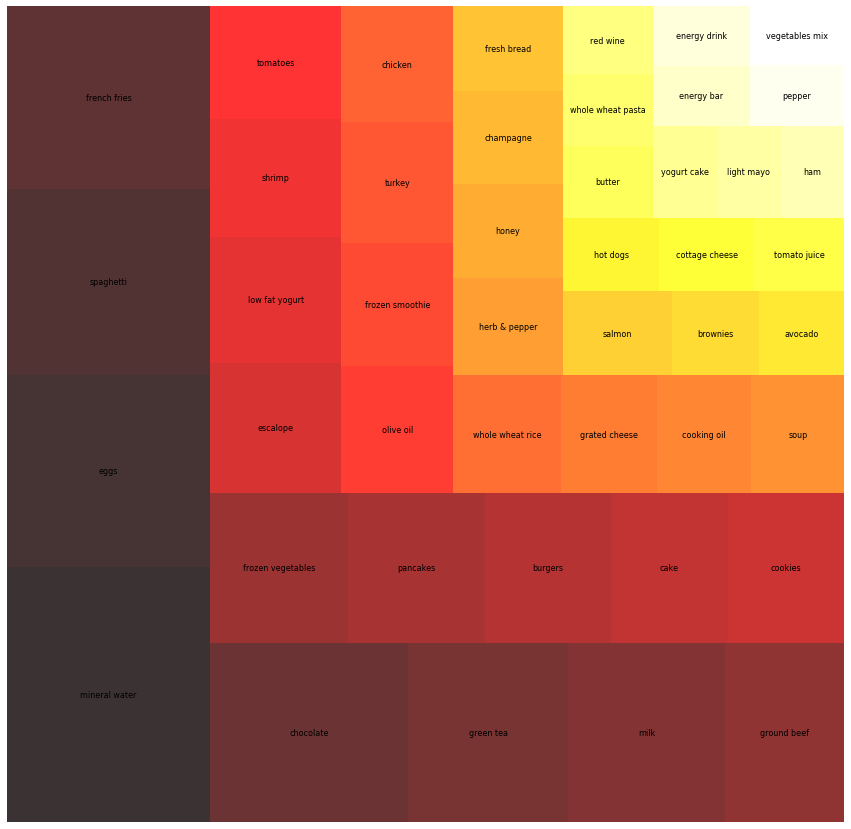

In [23]:
plt.figure(figsize=(15,15))
cnt = 45
color = plt.cm.hot(np.linspace(0, 1, cnt))
df_part = df_sum.head(cnt)
squarify.plot(sizes = df_part.values, label = df_part.index, alpha=.8, color = color, text_kwargs={'fontsize':8})
plt.axis('off')
plt.show()

In [24]:
arr = []
for i in range(df.shape[0]):
    arr.append([str(df.values[i,j]) for j in range(df.shape[1])])

arr = np.array(arr)



In [25]:
te = TransactionEncoder()
data = te.fit_transform(arr)
data = pd.DataFrame(data, columns = te.columns_)
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [26]:
data = data.drop(columns=['nan'])
data.head(5)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [27]:
freq_rules = apriori(data, min_support = 0.01, use_colnames = True)
freq_rules

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, ground beef, milk)"
253,0.017064,"(mineral water, spaghetti, ground beef)"
254,0.015731,"(mineral water, spaghetti, milk)"
255,0.010265,"(olive oil, mineral water, spaghetti)"


In [28]:
freq_rules['length'] = freq_rules['itemsets'].apply(lambda x: len(x))
freq_rules

,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
252,0.011065,"(mineral water, ground beef, milk)",3
253,0.017064,"(mineral water, spaghetti, ground beef)",3
254,0.015731,"(mineral water, spaghetti, milk)",3
255,0.010265,"(olive oil, mineral water, spaghetti)",3


In [29]:
freq_rules[ (freq_rules['length'] == 2) &
                   (freq_rules['support'] >= 0.05) ]

,support,itemsets,length
118,0.052660,"(mineral water, chocolate)",2
144,0.050927,"(mineral water, eggs)",2
224,0.059725,"(mineral water, spaghetti)",2


In [30]:
freq_rules[ (freq_rules['length'] == 1) &
                   (freq_rules['support'] >= 0.05) ]

,support,itemsets,length
6,0.087188,(burgers),1
8,0.081056,(cake),1
12,0.059992,(chicken),1
13,0.163845,(chocolate),1
15,0.080389,(cookies),1
16,0.051060,(cooking oil),1
19,0.179709,(eggs),1
22,0.079323,(escalope),1
24,0.170911,(french fries),1
29,0.063325,(frozen smoothie),1


In [31]:
rules = association_rules(freq_rules, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
158,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,1,1
159,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,1,1
329,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,1,2
324,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,2,1
338,"(mineral water, spaghetti)",(olive oil),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021,2,1
...,...,...,...,...,...,...,...,...,...,...,...
101,(eggs),(low fat yogurt),0.179709,0.076523,0.016798,0.093472,1.221484,0.003046,1.018696,1,1
152,(shrimp),(green tea),0.071457,0.132116,0.011465,0.160448,1.214449,0.002025,1.033747,1,1
153,(green tea),(shrimp),0.132116,0.071457,0.011465,0.086781,1.214449,0.002025,1.016780,1,1
109,(french fries),(escalope),0.170911,0.079323,0.016398,0.095944,1.209537,0.002841,1.018385,1,1


In [32]:
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
286,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,2,1
320,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,2,1
262,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,2,1
308,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,2,1
215,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,1,1
...,...,...,...,...,...,...,...,...,...,...,...
208,(mineral water),(red wine),0.238368,0.028130,0.010932,0.045861,1.630358,0.004227,1.018584,1,1
340,(mineral water),"(olive oil, spaghetti)",0.238368,0.022930,0.010265,0.043065,1.878079,0.004799,1.021041,1,2
38,(mineral water),(cereals),0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,1,1
304,(mineral water),"(french fries, spaghetti)",0.238368,0.027596,0.010132,0.042506,1.540263,0.003554,1.015571,1,2
